<a href="https://colab.research.google.com/github/SMohnish/SMohnish/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df= pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

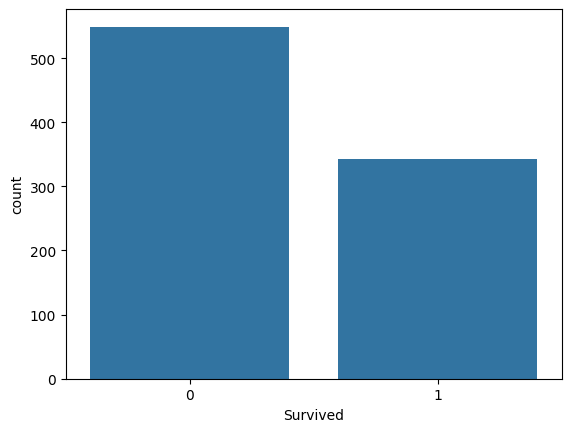

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Survived",data=df)

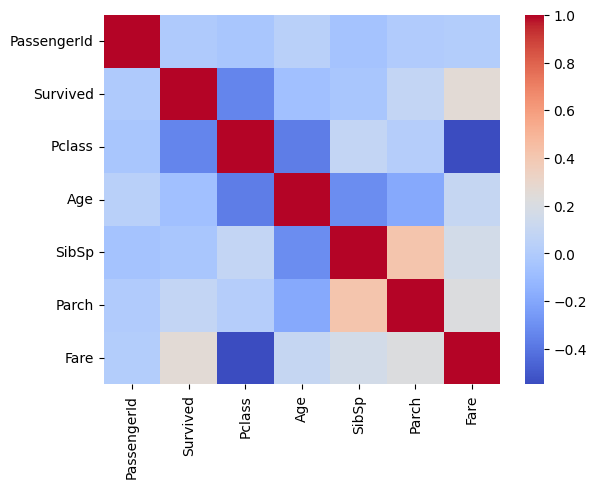

In [ ]:
titanic_train=df.copy()
objects=["Name","Sex","Cabin","Ticket","Embarked"]
for i in objects:
         titanic_train.drop(i,axis=1, inplace=True)
sns.heatmap(titanic_train.corr(),cmap="coolwarm")
plt.show()

In [ ]:
corr_matrix=titanic_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for  train_indices,test_indices in split.split(df,df[["Sex","Survived","Pclass"]]):
  strat_train_set=df.loc[train_indices]
  strat_test_set=df.loc[test_indices]

In [ ]:
train_indices

array([294, 461, 392, 626, 393, 132, 206,  36, 784, 597, 551, 744,  58,
       536, 513, 886, 800, 352, 501, 180, 702, 874, 746, 707, 722, 155,
       506, 137,  50,  29, 556, 369, 691, 883, 276,   6, 728, 491,  39,
       113, 719, 654, 743, 733, 215, 398, 298, 530, 107, 659, 158,  60,
       122, 208, 167, 457, 402, 225, 211, 503, 510, 324, 247, 808, 205,
       257, 736, 625, 559, 769, 734, 253, 248, 271, 715, 418, 413,  77,
        69, 567,  56, 633,  97, 720, 778, 483, 212, 222, 148, 540, 575,
       111, 845, 620, 472, 441, 337, 456, 376, 619, 183, 207, 370, 163,
       815, 565, 445, 545, 853,  65, 877, 159, 131, 447, 834, 755, 737,
       243,  15,  71, 820, 172, 622, 383, 748, 282, 572, 450, 831, 797,
       291,  94, 437,  63, 647, 890, 745,   9, 319,  96, 357, 269, 130,
       606, 774, 573, 796, 725, 410, 735, 525, 750, 856, 451, 521, 507,
       889, 614,  80, 146, 832,  85, 425, 764,  54, 887, 605, 149,  87,
       124,  75, 331, 847, 542, 749, 568, 140, 152,  83, 126, 84

In [ ]:
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
...,...,...,...,...,...,...,...,...,...,...,...,...
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S


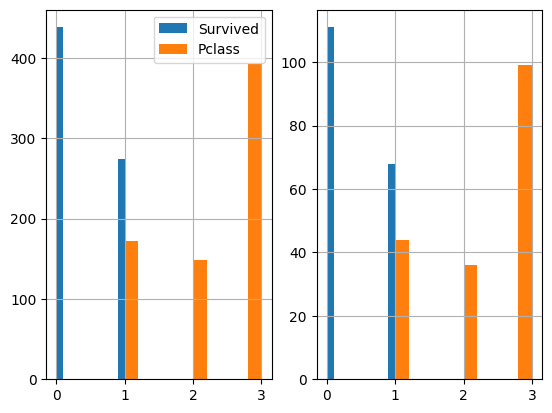

In [ ]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
plt.legend(["Survived","Pclass"])
plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
plt.show()

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 294 to 858
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    imputer=SimpleImputer(strategy="mean")
    X["Age"]= imputer.fit_transform(X[["Age"]])
    return X

In [ ]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    encoder=OneHotEncoder()
    matrix=encoder.fit_transform(X[["Embarked"]]).toarray()
    column_name=["C","S","Q","N"]
    for i in range(len(matrix.T)):
      X[column_name[i]]=matrix.T[i]

    matrix=encoder.fit_transform(X[["Sex"]]).toarray()
    column_name=["Female","Male"]
    for i in range(len(matrix.T)):
      X[column_name[i]]=matrix.T[i]

    return X


In [ ]:
class FeatureDropper(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    X.drop(["Embarked","Sex","Name","Ticket","Cabin","N"],axis=1,errors="ignore")
    return X

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])
strat_train_set=pipeline.fit_transform(strat_train_set)

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [ ]:
strat_train_set=pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,S,Q,N,Female,Male
294,295,0,3,"Mineff, Mr. Ivan",male,24.000000,0,0,349233,7.8958,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
461,462,0,3,"Morley, Mr. William",male,34.000000,0,0,364506,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.000000,2,0,3101277,7.9250,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.000000,0,0,219533,12.3500,NaN,Q,0.0,1.0,0.0,0.0,0.0,1.0
393,394,1,1,"Newell, Miss. Marjorie",female,23.000000,1,0,35273,113.2750,D36,C,1.0,0.0,0.0,0.0,1.0,0.0
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.000000,1,0,A/5. 3337,14.5000,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.000000,1,0,3101278,15.8500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
36,37,1,3,"Mamee, Mr. Hanna",male,29.779965,0,0,2677,7.2292,NaN,C,1.0,0.0,0.0,0.0,0.0,1.0
784,785,0,3,"Ali, Mr. William",male,25.000000,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0000,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
for i in ["Name","Sex","Ticket","Cabin","Embarked","N"]:
        strat_train_set.drop(i,axis=1,inplace=True,errors="ignore")
        strat_test_set.drop(i,axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
X= strat_train_set.drop(["Survived"],axis=1)
y=strat_train_set["Survived"]
scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf=RandomForestClassifier()
param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10], "min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_score_

np.float64(0.8145764634967912)

In [ ]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [ ]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,S,Q,N,Female,Male
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.000000,0,0,113786,30.5000,C104,S,0.0,0.0,1.0,0.0,0.0,1.0
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,29.370567,1,0,386525,16.1000,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.000000,0,0,13214,30.5000,B50,C,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,774,0,3,"Elias, Mr. Dibo",male,29.370567,0,0,2674,7.2250,NaN,C,1.0,0.0,0.0,0.0,0.0,1.0
358,359,1,3,"McGovern, Miss. Mary",female,29.370567,0,0,330931,7.8792,NaN,Q,0.0,1.0,0.0,0.0,1.0,0.0
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,29.370567,0,0,112379,39.6000,NaN,C,1.0,0.0,0.0,0.0,0.0,1.0
464,465,0,3,"Maisner, Mr. Simon",male,29.370567,0,0,A/S 2816,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [ ]:
final_clf=grid_search.best_estimator_

In [ ]:
final_clf.score(X_data_test,y_data_test)

0.8156424581005587

In [ ]:
final_data=pipeline.fit_transform(df)

In [ ]:
X_final=final_data.drop(['Survived'],axis=1)
y_final=final_data['Survived']

scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [ ]:
prod_clf=RandomForestClassifier()
param_grid=[
    {"n_estimators":[10,100,200,500,1000],"max_depth":[None,5,10], "min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_clf_final=grid_search.best_estimator_

In [ ]:
prod_clf_final.score(X_data_final,y_data_final)


0.9562289562289562

In [ ]:
test_data=pd.read_csv("/content/test.csv")

In [ ]:
final_test_data=pipeline.fit_transform(test_data)

In [ ]:
for i in ["Name","Sex","Ticket","Cabin","Embarked","N"]:
        final_test_data.drop(i,axis=1,inplace=True,errors="ignore")


In [ ]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method="ffill")

scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

/tmp/ipython-input-3292147837.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test=X_final_test.fillna(method="ffill")


In [ ]:
predictions=prod_clf_final.predict(X_data_final_test)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
final_df=pd.DataFrame(test_data["PassengerId"])
final_df['Survived']=predictions
final_df.to_csv("predictions1.csv", index=False)